<a href="https://colab.research.google.com/github/SindhuraShankeshi/colab/blob/main/Overfitting%26Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#HANDS ON OVERFITTING
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from cv2 import DenseOpticalFlow
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.12.0'

In [21]:
N_SAMPLES = 2000
TEST_SIZE = 0.2
X, y = make_moons(n_samples = N_SAMPLES, noise=0.25, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=42)

In [22]:
def mscatter(x,y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, str):
                marker_path = mmarkers.MarkerStyle(marker).get_path().transformed(
                    mmarkers.MarkerStyle(marker).get_transform())
            else:
                marker_path = marker
            paths.append(marker_path)
        sc.set_paths(paths)
    return sc

<Figure size 200x200 with 0 Axes>

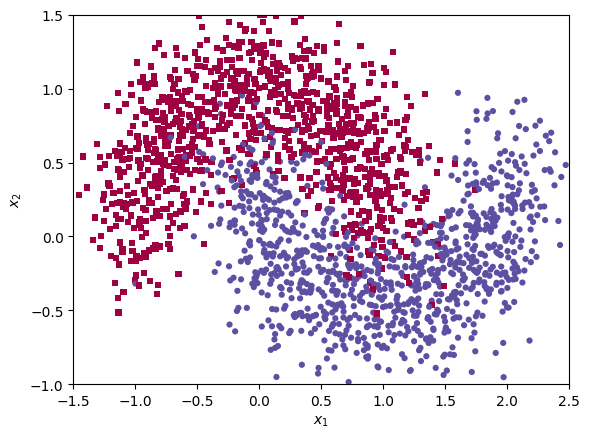

In [23]:
def make_plot(X, y, plot_name, file_name, XX=None, YY=None, preds=None):
    plt.figure(figsize=(2,2))
    plt.figure()
    # sns.set_style("whitegrid")
    axes = plt.gca()
    axes.set_xlim([-1.5,2.5])
    axes.set_ylim([-1,1.5])
    axes.set(xlabel="$x_1$", ylabel="$x_2$")
    # Plot prediction surface
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha=0.08, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), 
        levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    # Plot samples
    markers = ['o' if i == 1 else 's' for i in y.ravel()]
    mscatter(X[:, 0], X[:, 1], c=y.ravel(), s=20, cmap=plt.cm.Spectral, edgecolors='none', m=markers)
   

# Plot data points
make_plot(X, y, None, "dataset.svg")


Epoch 1/10
50/50 [==============================] - 2s 4ms/step - loss: 0.5994 - accuracy: 0.8381
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3318 - accuracy: 0.8694
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2942 - accuracy: 0.8769
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.8919
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.8994
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2433 - accuracy: 0.9038
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2037 - accuracy: 0.9212
Epoch 8/10
50/50 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9275
Epoch 9/10
50/50 [==============================] - 0s 4ms/step - loss: 0.1778 - accuracy: 0.9362
Epoch 10/10
13/13 [==============================] - 0s 2ms/step


<Figure size 200x200 with 0 Axes>

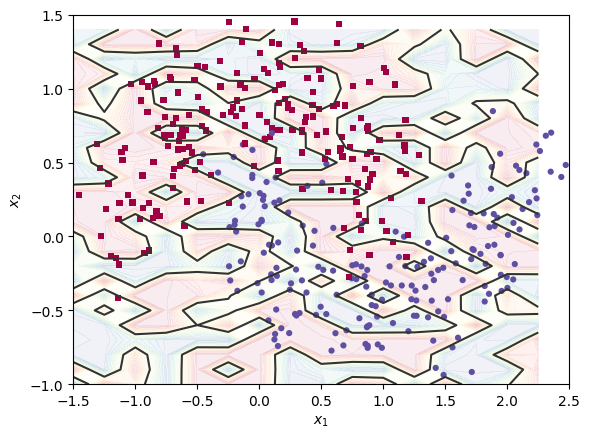

In [24]:
N_EPOCHS=10

for n in range(5): # Create 5 different network with different layers
    model = keras.Sequential()
    # Create 1st layer
    model.add(layers.Dense(8, input_dim=2, activation='relu'))
    for _ in range(n): # Add nth layer
        model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) # Add last layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Configure and train
history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=1)
preds=model.predict(X_test).reshape(-1)

title = "Network layer ({})".format(n)
file = "NetworkCapacity%f.png"%(2+n*1)
XX, YY = np.meshgrid(np.arange(-1.5, 2.5, 0.25), np.arange(-1, 1.5, 0.1))
make_plot(X_test, y_test, title, file, XX, YY, preds)

Epoch 1/10
50/50 [==============================] - 2s 2ms/step - loss: 0.5249 - accuracy: 0.7406
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8562
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8931
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9200
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9181
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9194
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9181
Epoch 8/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9269
Epoch 9/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.9312
Epoch 10/10
13/13 [==============================] - 0s 2ms/step
Epoch 1/10
50/50 [==============================] - 2

<Figure size 200x200 with 0 Axes>

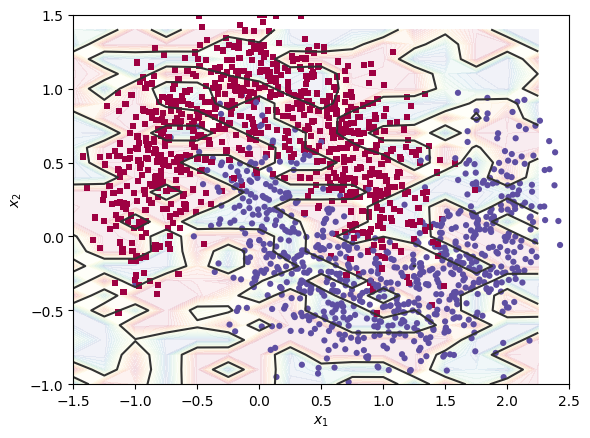

<Figure size 200x200 with 0 Axes>

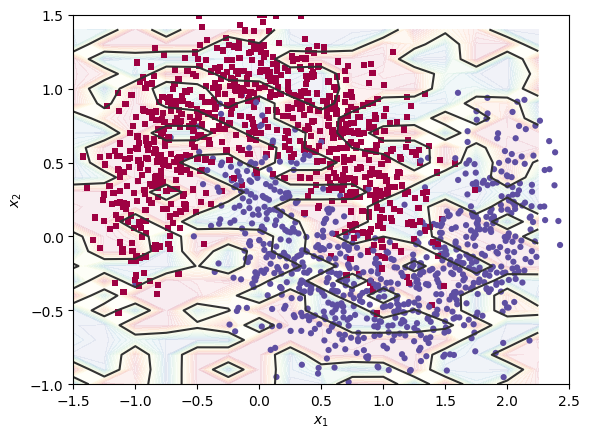

<Figure size 200x200 with 0 Axes>

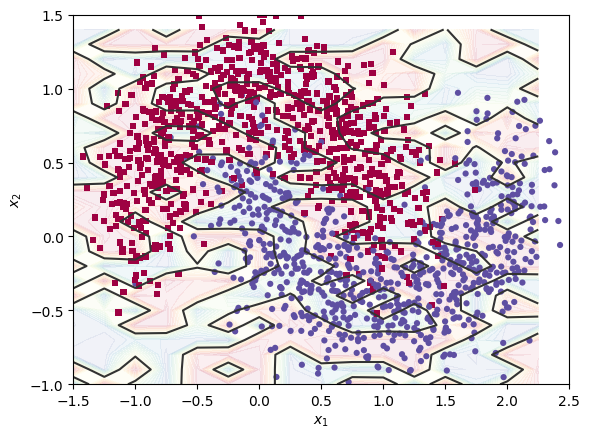

<Figure size 200x200 with 0 Axes>

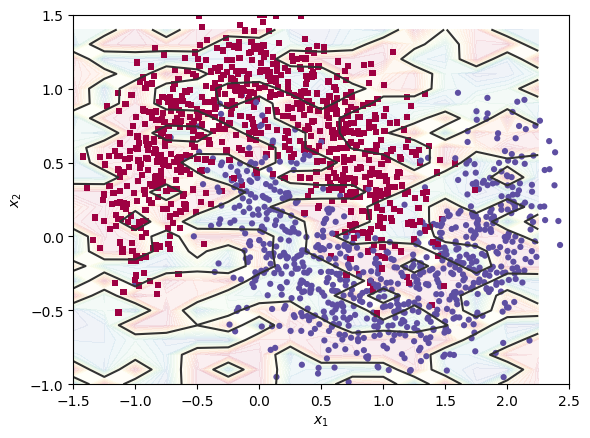

<Figure size 200x200 with 0 Axes>

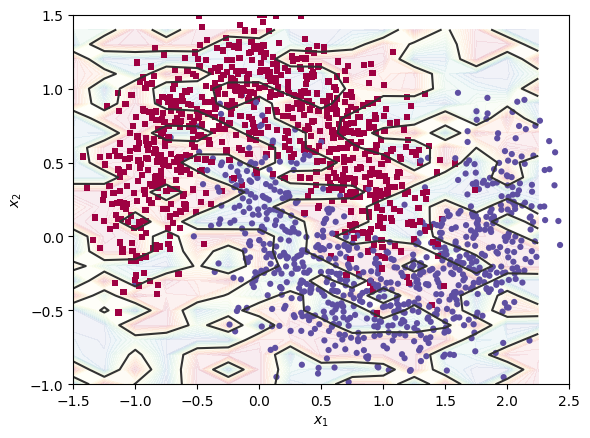

In [25]:
for n in range(5): # Create 5 different networks with different number of Dropout layers
    model = keras.Sequential()
    # Create 1st layer
    model.add(layers.Dense(8, input_dim=2,activation='relu'))
    counter = 0
    for _ in range(5): # Total number of layers is 5
        model.add(layers.Dense(64, activation='relu'))
        if counter < n: # Add n Dropout layers
            counter += 1
            model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(1, activation='sigmoid')) # Output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', 
    metrics=['accuracy']) # Configure and train
    # Train
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=1)
    # Plot decision boundaries for different number of Dropout layers
    preds=model.predict(X_test).reshape(-1)
    title = "Dropout({})".format(n)
    file = "Dropout%f.png"%(n)
    make_plot(X_train, y_train, title, file, XX, YY, preds)

In [26]:
#REGULARIZATION
from keras import regularizers
def build_model_with_regularization(_lambda):
    # Create networks with regularization terms
    model = keras.Sequential()
    model.add(layers.Dense(8, input_dim=2,activation='relu')) # without regularization
    model.add(layers.Dense(256, activation='relu', # With L2 regularization
    kernel_regularizer=regularizers.l2(_lambda)))
    model.add(layers.Dense(256, activation='relu', # With L2 regularization
                    kernel_regularizer=regularizers.l2(_lambda)))
    model.add(layers.Dense(256, activation='relu', # With L2 regularization
    kernel_regularizer=regularizers.l2(_lambda)))
    # Output
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', 
    metrics=['accuracy']) # Configure and train
    return model

In [27]:
def plot_weights_matrix(model, layer_index, plot_name, file_name):
    # Plot weight ranges
    # Get weights for certain layers
    LAYER_INDEX=layer_index
    weights = model.layers[LAYER_INDEX].get_weights()[0]
    # Get minimum, maximum and mean values
    min_val = round(weights.min(), 4)
    max_val = round(weights.max(), 4)
    mean_val = round(weights.mean(), 4)
    shape = weights.shape
    # Generate grids
    X = np.array(range(shape[1]))
    Y = np.array(range(shape[0]))
    X, Y = np.meshgrid(X, Y)
    print(file_name, min_val, max_val,mean_val)
    # Plot 3D figures
    fig = plt.figure()
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # Plot weight ranges
    surf = ax.plot_surface(X, Y, weights, cmap=plt.get_cmap('rainbow'), linewidth=0)
    ax.set_xlabel('x', fontsize=16, rotation = 0)
    ax.set_ylabel('y', fontsize=16, rotation = 0)
    ax.set_zlabel('weight', fontsize=16, rotation = 90)
    # save figure
    # create a new directory called regularization and place it in there
    

Epoch 1/10
50/50 [==============================] - 1s 6ms/step - loss: 0.3996 - accuracy: 0.8475
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 0.2823 - accuracy: 0.8881
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.9150
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.1969 - accuracy: 0.9250
Epoch 5/10
50/50 [==============================] - 1s 10ms/step - loss: 0.1914 - accuracy: 0.9319
Epoch 6/10
50/50 [==============================] - 0s 10ms/step - loss: 0.1787 - accuracy: 0.9344
Epoch 7/10
50/50 [==============================] - 0s 10ms/step - loss: 0.1741 - accuracy: 0.9388
Epoch 8/10
50/50 [==============================] - 0s 9ms/step - loss: 0.1769 - accuracy: 0.9375
Epoch 9/10
50/50 [==============================] - 0s 10ms/step - loss: 0.1685 - accuracy: 0.9362
Epoch 10/10
50/50 [==============================] - 0s 9ms/step - loss: 0.1724 - accuracy: 0.9362
 Regularization

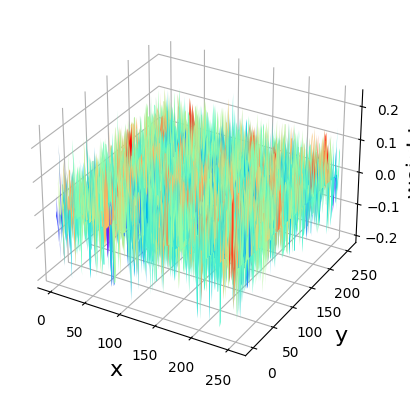

<Figure size 200x200 with 0 Axes>

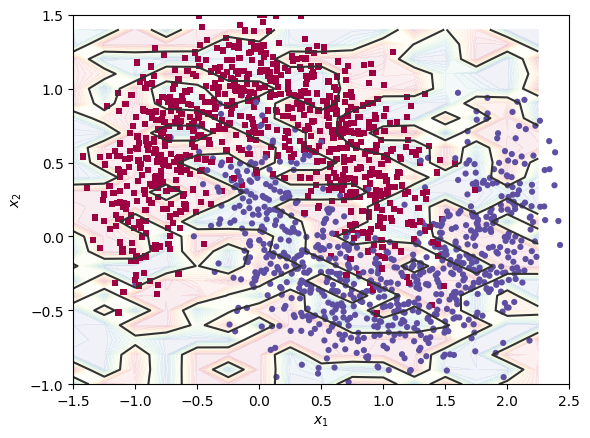

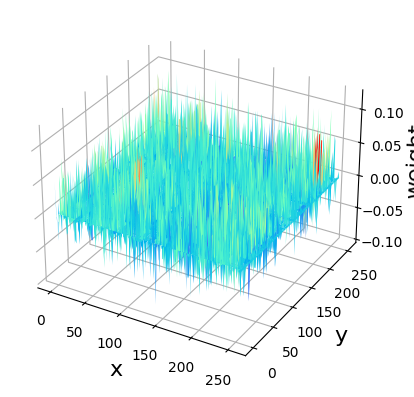

<Figure size 200x200 with 0 Axes>

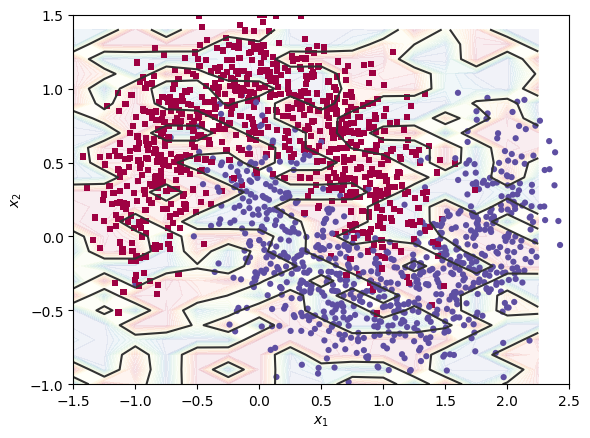

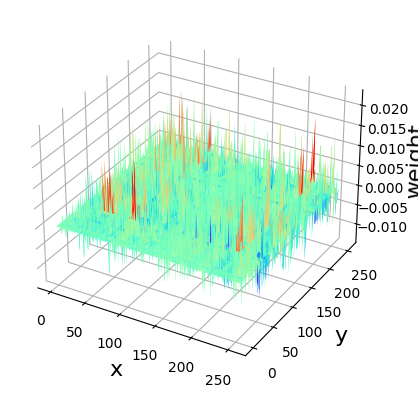

<Figure size 200x200 with 0 Axes>

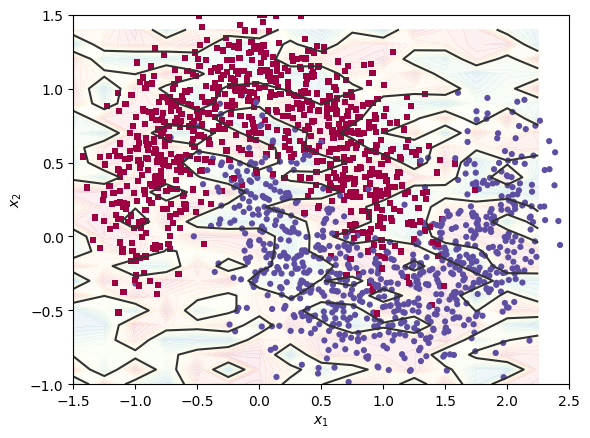

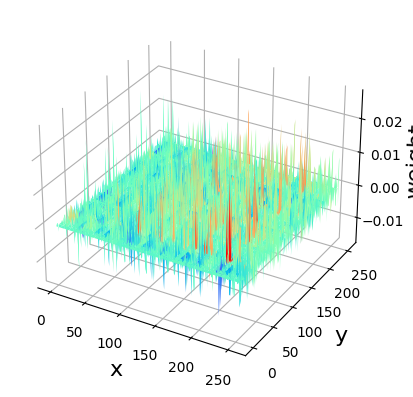

<Figure size 200x200 with 0 Axes>

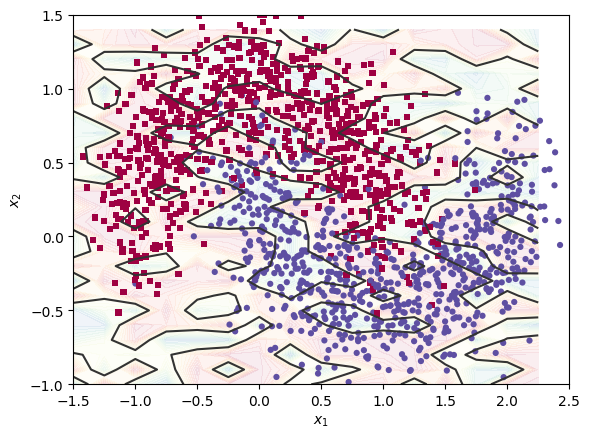

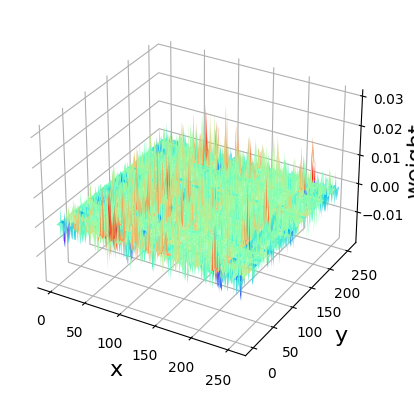

<Figure size 200x200 with 0 Axes>

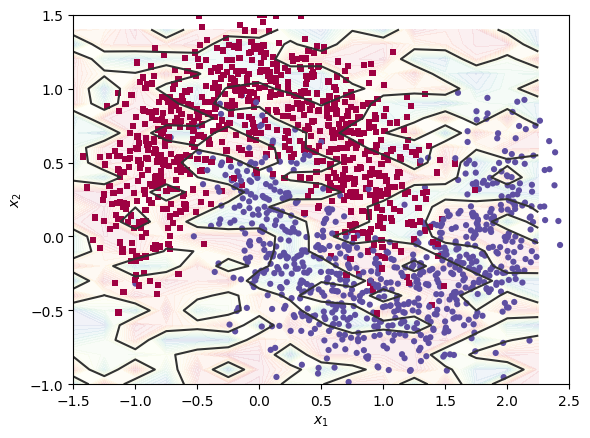

In [28]:
for _lambda in [1e-5,1e-3,1e-1,0.12,0.13]:
    # Create model with regularization term
    model = build_model_with_regularization(_lambda)
    # Train model
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, 
    verbose=1)
    # Plot weight range
    layer_index = 2
    plot_title = "Regularization-[lambda = {}]".format(str(_lambda))
    file_name = " Regularization _" + str(_lambda)
    # Plot weight ranges
    plot_weights_matrix(model, layer_index, plot_title, file_name)
    # Plot decision boundaries
    # preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
    preds=model.predict(X_test).reshape(-1)
    title = " regularization ".format(_lambda)
    file = " regularization %f.svg"%_lambda
    make_plot(X_train, y_train, title, file, XX, YY, preds)